In [1]:
import re
import math
import glob 
import chardet
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.gridspec import GridSpec

path = './finance_data/'

In [2]:
all_files = glob.glob(path + 'moex-IMOEX-*-marg-optionsdesk.csv')

In [3]:
with open(path + "moex-IMOEX-120325-marg-optionsdesk.csv", "rb") as f:
    result_encoding = chardet.detect(f.read())
    print(result_encoding["encoding"])

windows-1251


In [4]:
dfs = []

for filename in all_files:
    date_match = re.search(r'IMOEX-(\d{6})', filename)
    
    if date_match:
        date_str = date_match.group(1)
        
        #convertion date to format dd.mm.yyyy
        day = date_str[:2]
        month = date_str[2:4]
        year = '20' + date_str[4:6]
        
        formatted_date = f"{day}.{month}.{year}"
        
        df_start = pd.read_csv(filename, encoding = 'windows-1251')
        
        df_start['execution_date'] = formatted_date
        dfs.append(df_start)
        print(f"Processed {filename} with date {formatted_date}")


Processed ./finance_data\moex-IMOEX-120325-marg-optionsdesk.csv with date 12.03.2025
Processed ./finance_data\moex-IMOEX-150328-marg-optionsdesk.csv with date 15.03.2028
Processed ./finance_data\moex-IMOEX-150927-marg-optionsdesk.csv with date 15.09.2027
Processed ./finance_data\moex-IMOEX-151025-marg-optionsdesk.csv with date 15.10.2025
Processed ./finance_data\moex-IMOEX-151227-marg-optionsdesk.csv with date 15.12.2027
Processed ./finance_data\moex-IMOEX-160425-marg-optionsdesk.csv with date 16.04.2025
Processed ./finance_data\moex-IMOEX-160627-marg-optionsdesk.csv with date 16.06.2027
Processed ./finance_data\moex-IMOEX-170327-marg-optionsdesk.csv with date 17.03.2027
Processed ./finance_data\moex-IMOEX-170626-marg-optionsdesk.csv with date 17.06.2026
Processed ./finance_data\moex-IMOEX-180226-marg-optionsdesk.csv with date 18.02.2026
Processed ./finance_data\moex-IMOEX-180326-marg-optionsdesk.csv with date 18.03.2026
Processed ./finance_data\moex-IMOEX-180625-marg-optionsdesk.csv w

In [5]:
if dfs:
    combined_df = pd.concat(dfs, ignore_index=True)
    
    combined_df['execution_date_dt'] = pd.to_datetime(combined_df['execution_date'], format='%d.%m.%Y')
    
    combined_df = combined_df.sort_values('execution_date_dt')
    
    combined_df.to_csv('combined_moex_options.csv', encoding='utf-8', index=False)
    
    print(f"Combined {len(dfs)} files into 'combined_moex_options.csv'")
    print(f"Shape of combined dataframe: {combined_df.shape}")
    
    # to verify if needed
    # print(combined_df.head())
else:
    print("No matching files found.")

Combined 15 files into 'combined_moex_options.csv'
Shape of combined dataframe: (759, 67)


In [6]:
for filename in all_files:
    df_start = pd.read_csv(filename, encoding='windows-1251')
    
    for col in df_start.select_dtypes(include=[object]):
        df_start[col] = df_start[col].astype(str).str.encode('windows-1251', errors='ignore').str.decode('utf-8')
    
    dfs.append(df_start)

In [7]:
df_combined = pd.read_csv('combined_moex_options.csv', encoding='utf-8')

# for i, col in enumerate(df_combined.columns):
#     print(f"{i}: {col}")

In [8]:
#clean corrupted columns
corrupted_cols = [col for col in df_combined.columns if '�' in str(col) or 'пїЅ' in str(col) or '???' in str(col)]
df_combined = df_combined.drop(columns=corrupted_cols)
df_combined = df_combined.drop(columns=['Unnamed: 22', 'execution_date'])

df_combined.head(20)

,"CALL: Объем торгов, руб","CALL: Объем торгов, контр",CALL: Открыт.позиций,"CALL: Последняя сделка, Значение","CALL: Последняя сделка, Дата","CALL: Последняя сделка, Изменение",CALL: ПОКУПКА,CALL: ПРОДАЖА,CALL: Расчетная цена,CALL: Теоретическая цена,...,PUT: Расчетная цена,PUT: ПОКУПКА,PUT: ПРОДАЖА,"PUT: Последняя сделка, Значение","PUT: Последняя сделка, Дата","PUT: Последняя сделка, Изменение",PUT: Открыт. позиций,"PUT: Объем торгов, руб","PUT: Объем торгов, контр",execution_date_dt
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,369.08,330.42,...,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-12
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.12,0.01,...,328.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-12
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.71,0.28,0.01,...,278.95,313.73,324.53,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-12
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.75,0.68,0.03,...,229.53,264.18,275.91,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-12
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.74,1.74,0.12,...,180.76,214.14,223.42,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-12
5,NaN,NaN,NaN,NaN,NaN,NaN,0.01,8.76,10.97,2.36,...,90.34,116.38,128.11,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-12
6,NaN,NaN,NaN,NaN,NaN,NaN,4.13,15.86,24.52,8.61,...,54.07,72.01,83.73,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-12
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.21,4.47,0.56,...,133.67,166.52,178.24,118.37,07.03.25 17:18:56,NaN,100.0,167500.0,50.0,2025-03-12
8,NaN,NaN,NaN,NaN,NaN,NaN,46.23,57.96,82.47,51.12,...,12.37,15.84,27.57,NaN,NaN,NaN,100.0,NaN,NaN,2025-03-12
9,155000.0,50.0,100.0,136.70,07.03.25 17:18:54,NaN,79.21,90.89,124.74,88.81,...,4.81,2.36,13.78,NaN,NaN,NaN,100.0,NaN,NaN,2025-03-12


In [9]:
with open("combined_moex_options.csv", "rb") as f:
    result_en = chardet.detect(f.read())
    print(f"Detected encoding after saving: {result_en['encoding']}")

Detected encoding after saving: utf-8


In [10]:
#clean missing columns
missing_percentage = df_combined.isna().mean() * 100

for col, pct in missing_percentage.items():
    print(f"{col}: {pct:.2f}%")

trg_vl_miss = 96
columns_to_drop = missing_percentage[missing_percentage >= trg_vl_miss].index.tolist()

print(f"\nDropping {len(columns_to_drop)} columns with {trg_vl_miss}% or more missing values")

df_cleaned = df_combined.drop(columns=columns_to_drop)

df_cleaned.to_csv('cleaned_moex_options.csv', encoding='utf-8', index=False)

print(f"Original DataFrame shape: {df_combined.shape}")
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")

CALL: Объем торгов, руб: 99.74%
CALL: Объем торгов, контр: 99.74%
CALL: Открыт.позиций: 95.13%
CALL: Последняя сделка, Значение: 99.74%
CALL: Последняя сделка, Дата: 99.74%
CALL: Последняя сделка, Изменение: 100.00%
CALL: ПОКУПКА: 96.05%
CALL: ПРОДАЖА: 95.52%
CALL: Расчетная цена: 16.07%
CALL: Теоретическая цена: 16.07%
СТРАЙК: 16.07%
IV: 0.00%
PUT: Теоретическая цена: 16.07%
PUT: Расчетная цена: 16.07%
PUT: ПОКУПКА: 95.78%
PUT: ПРОДАЖА: 95.52%
PUT: Последняя сделка, Значение: 99.47%
PUT: Последняя сделка, Дата: 99.47%
PUT: Последняя сделка, Изменение: 99.87%
PUT: Открыт. позиций: 97.76%
PUT: Объем торгов, руб: 99.47%
PUT: Объем торгов, контр: 99.47%
execution_date_dt: 0.00%

Dropping 12 columns with 96% or more missing values
Original DataFrame shape: (759, 23)
Cleaned DataFrame shape: (759, 11)


In [11]:
df_cleaned.head(10)

,CALL: Открыт.позиций,CALL: ПРОДАЖА,CALL: Расчетная цена,CALL: Теоретическая цена,СТРАЙК,IV,PUT: Теоретическая цена,PUT: Расчетная цена,PUT: ПОКУПКА,PUT: ПРОДАЖА,execution_date_dt
0,NaN,NaN,369.08,330.42,2850.0,30.04,0.03,0.02,NaN,NaN,2025-03-12
1,NaN,NaN,0.12,0.01,3550.0,24.66,367.57,328.62,NaN,NaN,2025-03-12
2,NaN,5.71,0.28,0.01,3500.0,23.52,317.72,278.95,313.73,324.53,2025-03-12
3,NaN,5.75,0.68,0.03,3450.0,22.54,267.88,229.53,264.18,275.91,2025-03-12
4,NaN,5.74,1.74,0.12,3400.0,21.76,218.12,180.76,214.14,223.42,2025-03-12
5,NaN,8.76,10.97,2.36,3300.0,20.92,120.66,90.34,116.38,128.11,2025-03-12
6,NaN,15.86,24.52,8.61,3250.0,21.17,77.05,54.07,72.01,83.73,2025-03-12
7,NaN,7.21,4.47,0.56,3350.0,21.20,168.70,133.67,166.52,178.24,2025-03-12
8,NaN,57.96,82.47,51.12,3150.0,22.46,19.85,12.37,15.84,27.57,2025-03-12
9,100.0,90.89,124.74,88.81,3100.0,23.11,7.68,4.81,2.36,13.78,2025-03-12


In [12]:
# математическое ожидание и стандартное отклонение для Расчтенной цены Call опциона
call_Settlement_price = 'CALL: Расчетная цена'
date_ex = 'execution_date_dt'
math_expectation = df_cleaned[call_Settlement_price].mean()
std_deviation = df_cleaned[call_Settlement_price].std()
print(f"\nМатематическое ожидание цены: {math_expectation:.2f}")
print(f"Стандартное отклонение цены (волатильность): {std_deviation:.2f}")


Математическое ожидание цены: 602.33
Стандартное отклонение цены (волатильность): 481.29


In [13]:
# Простейшая стратегия:
# Если цена ниже математического ожидания, считаем это сигналом для покупки ("Покупка").
# Если цена выше математического ожидания, сигнал для продажи ("Продажа").
def generate_signal(price):
    if price < math_expectation:
        return 'Покупка'
    elif price > math_expectation:
        return 'Продажа'
    else:
        return 'Нейтрально'
    
df_cleaned['Сигнал'] = df_cleaned[call_Settlement_price].apply(generate_signal)

df_cleaned.head(30)

,CALL: Открыт.позиций,CALL: ПРОДАЖА,CALL: Расчетная цена,CALL: Теоретическая цена,СТРАЙК,IV,PUT: Теоретическая цена,PUT: Расчетная цена,PUT: ПОКУПКА,PUT: ПРОДАЖА,execution_date_dt,Сигнал
0,NaN,NaN,369.08,330.42,2850.0,30.04,0.03,0.02,NaN,NaN,2025-03-12,Покупка
1,NaN,NaN,0.12,0.01,3550.0,24.66,367.57,328.62,NaN,NaN,2025-03-12,Покупка
2,NaN,5.71,0.28,0.01,3500.0,23.52,317.72,278.95,313.73,324.53,2025-03-12,Покупка
3,NaN,5.75,0.68,0.03,3450.0,22.54,267.88,229.53,264.18,275.91,2025-03-12,Покупка
4,NaN,5.74,1.74,0.12,3400.0,21.76,218.12,180.76,214.14,223.42,2025-03-12,Покупка
5,NaN,8.76,10.97,2.36,3300.0,20.92,120.66,90.34,116.38,128.11,2025-03-12,Покупка
6,NaN,15.86,24.52,8.61,3250.0,21.17,77.05,54.07,72.01,83.73,2025-03-12,Покупка
7,NaN,7.21,4.47,0.56,3350.0,21.20,168.70,133.67,166.52,178.24,2025-03-12,Покупка
8,NaN,57.96,82.47,51.12,3150.0,22.46,19.85,12.37,15.84,27.57,2025-03-12,Покупка
9,100.0,90.89,124.74,88.81,3100.0,23.11,7.68,4.81,2.36,13.78,2025-03-12,Покупка


In [14]:
#working with cleaned doata, creating new copy

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

df = pd.read_csv('cleaned_moex_options.csv')

df['execution_date_dt'] = pd.to_datetime(df['execution_date_dt'])

print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())

df.head()


Dataset shape: (759, 11)
Columns: ['CALL: Открыт.позиций', 'CALL: ПРОДАЖА', 'CALL: Расчетная цена', 'CALL: Теоретическая цена', 'СТРАЙК', 'IV', 'PUT: Теоретическая цена', 'PUT: Расчетная цена', 'PUT: ПОКУПКА', 'PUT: ПРОДАЖА', 'execution_date_dt']


,CALL: Открыт.позиций,CALL: ПРОДАЖА,CALL: Расчетная цена,CALL: Теоретическая цена,СТРАЙК,IV,PUT: Теоретическая цена,PUT: Расчетная цена,PUT: ПОКУПКА,PUT: ПРОДАЖА,execution_date_dt
0,NaN,NaN,369.08,330.42,2850.0,30.04,0.03,0.02,NaN,NaN,2025-03-12
1,NaN,NaN,0.12,0.01,3550.0,24.66,367.57,328.62,NaN,NaN,2025-03-12
2,NaN,5.71,0.28,0.01,3500.0,23.52,317.72,278.95,313.73,324.53,2025-03-12
3,NaN,5.75,0.68,0.03,3450.0,22.54,267.88,229.53,264.18,275.91,2025-03-12
4,NaN,5.74,1.74,0.12,3400.0,21.76,218.12,180.76,214.14,223.42,2025-03-12


In [15]:
# Cell 3: Explore available expiration dates and strikes
# Get unique expiration dates and sort them
expiry_dates = sorted(df['execution_date_dt'].unique())
print(f"Available expiration dates: {', '.join([str(date.date()) for date in expiry_dates[:5]])}...")

# Focus on the nearest three expiration dates
nearest_dates = expiry_dates[:3]
print(f"Focusing on nearest expiration dates: {', '.join([str(date.date()) for date in nearest_dates])}")

# Get unique strike prices and sort them
strikes = sorted(df['СТРАЙК'].dropna().unique())
print(f"Strike price range: {min(strikes)} to {max(strikes)}")
print(f"Number of available strikes: {len(strikes)}")

# Filter for options expiring on these dates
near_term_options = df[df['execution_date_dt'].isin(nearest_dates)]
print(f"Number of near-term options: {len(near_term_options)}")

Available expiration dates: 2025-03-12, 2025-03-19, 2025-03-26, 2025-04-16, 2025-06-18...
Focusing on nearest expiration dates: 2025-03-12, 2025-03-19, 2025-03-26
Strike price range: 1700.0 to 5000.0
Number of available strikes: 62
Number of near-term options: 91


In [16]:
# Filter options with both call and put prices available
option_pairs = near_term_options[
    near_term_options['CALL: Расчетная цена'].notna() & 
    near_term_options['PUT: Расчетная цена'].notna()
]

if len(option_pairs) < 5:
    print("Warning: Limited data for estimating current index level")
    avg_index_level = df['СТРАЙК'].dropna().median()
    print(f"Using median strike price as estimate: {avg_index_level:.2f}")
else:
    # For the simplest approach: S ≈ K + (C - P)
    option_pairs['implied_level'] = option_pairs['СТРАЙК'] + (
        option_pairs['CALL: Расчетная цена'] - option_pairs['PUT: Расчетная цена']
    )
    
    option_pairs['call_put_diff'] = abs(option_pairs['CALL: Расчетная цена'] - option_pairs['PUT: Расчетная цена'])
    option_pairs_sorted = option_pairs.sort_values('call_put_diff')
    
    implied_index_df = option_pairs_sorted.head(5)[['СТРАЙК', 'implied_level', 'CALL: Расчетная цена', 'PUT: Расчетная цена', 'call_put_diff']]
    avg_index_level = implied_index_df['implied_level'].mean()
    
    print(f"Estimated current index level: {avg_index_level:.2f}")
    implied_index_df

Estimated current index level: 3233.93


In [17]:
def analyze_straddle_strategy(options_df, avg_index_level):
    """
    Analyze straddle strategy (long call + long put at the same strike)
    """
    print("\n=== STRADDLE STRATEGIES (LONG CALL + LONG PUT) ===")
    print("Good for expecting a big move in either direction")
    
    results = []
    
    try:
        # Get options with both call and put prices available, near the current index level
        straddles = options_df[
            options_df['CALL: ПРОДАЖА'].notna() & 
            options_df['PUT: ПРОДАЖА'].notna() &
            abs(options_df['СТРАЙК'] - avg_index_level) < 200  # Reasonably close to ATM
        ].copy()  # Create explicit copy
        
        if straddles.empty:
            print("No suitable options found for straddle strategy")
            return results
        
        for _, row in straddles.iterrows():
            call_cost = row['CALL: ПРОДАЖА']
            put_cost = row['PUT: ПРОДАЖА']
            
            # Check for NaN values
            if pd.isna(call_cost) or pd.isna(put_cost):
                continue
                
            total_cost = call_cost + put_cost
            
            # Skip if total cost is zero or negative (shouldn't happen but just in case)
            if total_cost <= 0:
                continue
                
            break_even_up = row['СТРАЙК'] + total_cost
            break_even_down = row['СТРАЙК'] - total_cost
            
            # Calculate percentage moves needed for profit
            pct_move_up = ((break_even_up - avg_index_level) / avg_index_level * 100)
            pct_move_down = ((avg_index_level - break_even_down) / avg_index_level * 100)
            
            # Position sizing
            contract_size = 100
            contracts = int(1_000_000 / (total_cost * contract_size))
            if contracts < 1:
                contracts = 1  # Minimum 1 contract
            total_investment = total_cost * contracts * contract_size
            
            result = {
                'date': row['execution_date_dt'],
                'strategy': 'Straddle',
                'strike': row['СТРАЙК'],
                'call_cost': call_cost,
                'put_cost': put_cost,
                'total_cost': total_cost,
                'break_even_up': break_even_up,
                'break_even_down': break_even_down,
                'pct_move_up': pct_move_up,
                'pct_move_down': pct_move_down,
                'contracts': contracts,
                'investment': total_investment,
                'max_loss': total_investment,
                'iv': row['IV'] if pd.notnull(row['IV']) else None
            }
            
            results.append(result)
            
            print(f"Expiry: {row['execution_date_dt'].date()}, Strike: {row['СТРАЙК']}, Total Cost: {total_cost:.2f}")
            print(f"  Break-even Up: {break_even_up:.2f} ({pct_move_up:.2f}% move)")
            print(f"  Break-even Down: {break_even_down:.2f} ({pct_move_down:.2f}% move)")
            print(f"  With 1,000,000 rubles: {contracts} contracts, Cost: {total_investment:,.0f} rubles")
            print(f"  Max loss: {total_investment:,.0f} rubles (entire premium)")
            print()
        
        # Sort straddles for easier analysis
        if results:
            results = sorted(results, key=lambda x: (x['date'], abs(x['strike'] - avg_index_level)))
    
    except Exception as e:
        print(f"Error in straddle analysis: {e}")
    
    return results

def analyze_strangle_strategy(options_df, avg_index_level, nearest_dates):
    """
    Analyze strangle strategy (long OTM call + long OTM put)
    """
    print("\n=== STRANGLE STRATEGIES (LONG OTM CALL + LONG OTM PUT) ===")
    print("Cheaper than straddle but requires a bigger move")
    
    results = []
    
    try:
        # Find OTM call options
        call_options = options_df[
            (options_df['CALL: ПРОДАЖА'].notna()) & 
            (options_df['СТРАЙК'] > avg_index_level)
        ].sort_values('СТРАЙК')
        
        # Find OTM put options
        put_options = options_df[
            (options_df['PUT: ПРОДАЖА'].notna()) & 
            (options_df['СТРАЙК'] < avg_index_level)
        ].sort_values('СТРАЙК', ascending=False)
        
        if call_options.empty or put_options.empty:
            print("Not enough data for strangle strategy - need both OTM calls and puts")
            return results
        
        # Group by expiration date to create potential strangles
        for date in nearest_dates:
            try:
                # Make explicit copies to avoid SettingWithCopyWarning
                date_calls = call_options[call_options['execution_date_dt'] == date].copy()
                date_puts = put_options[put_options['execution_date_dt'] == date].copy()
                
                if date_calls.empty or date_puts.empty:
                    continue
                
                # Target strikes ~5% OTM
                target_call_strike = avg_index_level * 1.05
                target_put_strike = avg_index_level * 0.95
                
                # Find closest strikes to our targets - safely
                if len(date_calls) > 0 and len(date_puts) > 0:
                    # Calculate strike differences - correct way to add a new column
                    date_calls['strike_diff'] = abs(date_calls['СТРАЙК'] - target_call_strike)
                    date_puts['strike_diff'] = abs(date_puts['СТРАЙК'] - target_put_strike)
                    
                    # Find the index with minimum difference
                    best_call_idx = date_calls['strike_diff'].idxmin()
                    best_put_idx = date_puts['strike_diff'].idxmin()
                    
                    # Get the rows
                    best_call = date_calls.loc[best_call_idx]
                    best_put = date_puts.loc[best_put_idx]
                    
                    call_cost = best_call['CALL: ПРОДАЖА']
                    put_cost = best_put['PUT: ПРОДАЖА']
                    
                    # Check for NaN values or non-positive values
                    if pd.isna(call_cost) or pd.isna(put_cost) or call_cost <= 0 or put_cost <= 0:
                        print(f"  Skipping date {date.date()} due to invalid cost values")
                        continue
                    
                    total_cost = call_cost + put_cost
                    
                    break_even_up = best_call['СТРАЙК'] + total_cost
                    break_even_down = best_put['СТРАЙК'] - total_cost
                    
                    # Calculate percentage moves needed for profit
                    pct_move_up = ((break_even_up - avg_index_level) / avg_index_level * 100)
                    pct_move_down = ((avg_index_level - break_even_down) / avg_index_level * 100)
                    
                    # Position sizing
                    contract_size = 100
                    contracts = int(1_000_000 / (total_cost * contract_size))
                    if contracts < 1:
                        contracts = 1  # Minimum 1 contract
                    total_investment = total_cost * contracts * contract_size
                    
                    result = {
                        'date': date,
                        'strategy': 'Strangle',
                        'call_strike': best_call['СТРАЙК'],
                        'put_strike': best_put['СТРАЙК'],
                        'call_cost': call_cost,
                        'put_cost': put_cost,
                        'total_cost': total_cost,
                        'break_even_up': break_even_up,
                        'break_even_down': break_even_down,
                        'pct_move_up': pct_move_up,
                        'pct_move_down': pct_move_down,
                        'contracts': contracts,
                        'investment': total_investment,
                        'max_loss': total_investment
                    }
                    
                    results.append(result)
                    
                    print(f"Expiry: {date.date()}")
                    print(f"  Call Strike: {best_call['СТРАЙК']}, Put Strike: {best_put['СТРАЙК']}")
                    print(f"  Total Cost: {total_cost:.2f}")
                    print(f"  Break-even Up: {break_even_up:.2f} ({pct_move_up:.2f}% move)")
                    print(f"  Break-even Down: {break_even_down:.2f} ({pct_move_down:.2f}% move)")
                    print(f"  With 1,000,000 rubles: {contracts} contracts, Cost: {total_investment:,.0f} rubles")
                    print(f"  Max loss: {total_investment:,.0f} rubles (entire premium)")
                    print()
                
            except (KeyError, ValueError) as e:
                print(f"  Error analyzing strangle for date {date.date()}: {e}")
                continue
                
    except Exception as e:
        print(f"Error in strangle analysis: {e}")
    
    return results

def analyze_bear_put_spread(options_df, avg_index_level, nearest_dates):
    """
    Analyze bear put spread strategy for downside protection
    """
    print("\n=== BEAR PUT SPREAD STRATEGIES ===")
    print("Good for expecting downside movement with defined risk")
    
    results = []
    
    try:
        for date in nearest_dates:
            try:
                date_options = options_df[options_df['execution_date_dt'] == date]
                
                if date_options.empty:
                    continue
                
                # Find ATM put options
                atm_puts = date_options[
                    (date_options['PUT: ПРОДАЖА'].notna()) &
                    (abs(date_options['СТРАЙК'] - avg_index_level) < 100)
                ].copy()  # Make explicit copy
                
                if atm_puts.empty:
                    continue
                
                # Sort by distance from avg_index_level - correct way to add column
                atm_puts['strike_diff'] = abs(atm_puts['СТРАЙК'] - avg_index_level)
                atm_put_idx = atm_puts['strike_diff'].idxmin()
                atm_put = atm_puts.loc[atm_put_idx]
                
                # Find OTM puts to sell (~10% lower)
                target_otm_strike = avg_index_level * 0.9
                otm_puts = date_options[
                    (date_options['PUT: ПОКУПКА'].notna()) & 
                    (date_options['СТРАЙК'] < atm_put['СТРАЙК'])
                ].copy()  # Make explicit copy
                
                if otm_puts.empty:
                    continue
                
                # Get the closest put to our target
                otm_puts['strike_diff'] = abs(otm_puts['СТРАЙК'] - target_otm_strike)
                otm_put_idx = otm_puts['strike_diff'].idxmin()
                otm_put = otm_puts.loc[otm_put_idx]
                
                buy_cost = atm_put['PUT: ПРОДАЖА']
                sell_credit = otm_put['PUT: ПОКУПКА']
                
                # Check for NaN values
                if pd.isna(buy_cost) or pd.isna(sell_credit):
                    print(f"  Skipping date {date.date()} due to NaN cost values")
                    continue
                    
                net_cost = buy_cost - sell_credit
                
                # Skip if net cost is negative or zero (unlikely but check anyway)
                if net_cost <= 0:
                    print(f"  Skipping date {date.date()} due to non-positive net cost: {net_cost}")
                    continue
                
                max_profit = atm_put['СТРАЙК'] - otm_put['СТРАЙК'] - net_cost
                max_loss = net_cost
                break_even = atm_put['СТРАЙК'] - net_cost
                
                # Calculate ROI
                roi = (max_profit / net_cost * 100)
                pct_move = ((avg_index_level - break_even) / avg_index_level * 100)
                
                # Position sizing
                contract_size = 100
                contracts = int(1_000_000 / (net_cost * contract_size))
                if contracts < 1:
                    contracts = 1  # Minimum 1 contract
                total_cost = net_cost * contracts * contract_size
                total_max_profit = max_profit * contracts * contract_size
                
                result = {
                    'date': date,
                    'strategy': 'Bear Put Spread',
                    'buy_strike': atm_put['СТРАЙК'],
                    'sell_strike': otm_put['СТРАЙК'],
                    'buy_cost': buy_cost,
                    'sell_credit': sell_credit,
                    'net_cost': net_cost,
                    'max_profit': max_profit,
                    'max_loss': max_loss,
                    'break_even': break_even,
                    'roi': roi,
                    'pct_move': pct_move,
                    'contracts': contracts,
                    'total_cost': total_cost,
                    'total_max_profit': total_max_profit
                }
                
                results.append(result)
                
                print(f"Expiry: {date.date()}")
                print(f"  Buy Put @ {atm_put['СТРАЙК']}, Sell Put @ {otm_put['СТРАЙК']}")
                print(f"  Net Cost: {net_cost:.2f}, Max Profit: {max_profit:.2f}")
                print(f"  Break-even: {break_even:.2f} ({pct_move:.2f}% move), ROI: {roi:.2f}%")
                print(f"  With 1,000,000 rubles: {contracts} contracts, Cost: {total_cost:,.0f} rubles")
                print(f"  Max profit: {total_max_profit:,.0f} rubles")
                print(f"  Max loss: {total_cost:,.0f} rubles")
                print()
                
            except (KeyError, ValueError) as e:
                print(f"  Error analyzing bear put spread for date {date.date()}: {e}")
                continue
                
    except Exception as e:
        print(f"Error in bear put spread analysis: {e}")
    
    return results

def analyze_directional_strategies(options_df, avg_index_level):
    """
    Analyze simple directional strategies (long call and long put)
    """
    long_call_results = []
    long_put_results = []
    
    # 1. LONG CALL
    print("\n=== LONG CALL STRATEGY ===")
    print("Simple directional bet on market rising")
    
    try:
        long_calls = options_df[
            (options_df['CALL: ПРОДАЖА'].notna()) &
            (abs(options_df['СТРАЙК'] - avg_index_level) < 200)  # Near ATM
        ].copy()  # Create explicit copy
        
        if long_calls.empty:
            print("No suitable options found for long call strategy")
        else:
            # Add calculated fields
            long_calls['break_even'] = long_calls['СТРАЙК'] + long_calls['CALL: ПРОДАЖА']
            long_calls['pct_move'] = ((long_calls['break_even'] - avg_index_level) / avg_index_level * 100)
            
            # Sort by expiration date and distance from ATM
            long_calls['strike_diff'] = abs(long_calls['СТРАЙК'] - avg_index_level)
            long_calls = long_calls.sort_values(['execution_date_dt', 'strike_diff']).head(3)
            
            for _, row in long_calls.iterrows():
                cost = row['CALL: ПРОДАЖА']
                
                # Check for NaN or non-positive values
                if pd.isna(cost) or cost <= 0:
                    continue
                    
                break_even = row['break_even']
                pct_move = row['pct_move']
                
                # Position sizing
                contract_size = 100
                contracts = int(1_000_000 / (cost * contract_size))
                if contracts < 1:
                    contracts = 1  # Minimum 1 contract
                total_cost = cost * contracts * contract_size
                
                result = {
                    'date': row['execution_date_dt'],
                    'strategy': 'Long Call',
                    'strike': row['СТРАЙК'],
                    'cost': cost,
                    'break_even': break_even,
                    'pct_move': pct_move,
                    'contracts': contracts,
                    'total_cost': total_cost,
                    'iv': row['IV'] if pd.notnull(row['IV']) else None
                }
                
                long_call_results.append(result)
                
                print(f"Expiry: {row['execution_date_dt'].date()}, Strike: {row['СТРАЙК']}, Cost: {cost:.2f}")
                print(f"  Break-even: {break_even:.2f} ({pct_move:.2f}% move)")
                print(f"  With 1,000,000 rubles: {contracts} contracts, Cost: {total_cost:,.0f} rubles")
                print(f"  Max loss: {total_cost:,.0f} rubles (entire premium)")
                print()
    except Exception as e:
        print(f"Error analyzing long call strategy: {e}")
    
    # 2. LONG PUT
    print("\n=== LONG PUT STRATEGY ===")
    print("Simple directional bet on market falling")
    
    try:
        long_puts = options_df[
            (options_df['PUT: ПРОДАЖА'].notna()) &
            (abs(options_df['СТРАЙК'] - avg_index_level) < 200)  # Near ATM
        ].copy()  # Create explicit copy
        
        if long_puts.empty:
            print("No suitable options found for long put strategy")
        else:
            # Add calculated fields
            long_puts['break_even'] = long_puts['СТРАЙК'] - long_puts['PUT: ПРОДАЖА']
            long_puts['pct_move'] = ((avg_index_level - long_puts['break_even']) / avg_index_level * 100)
            
            # Sort by expiration date and distance from ATM
            long_puts['strike_diff'] = abs(long_puts['СТРАЙК'] - avg_index_level)
            long_puts = long_puts.sort_values(['execution_date_dt', 'strike_diff']).head(3)
            
            for _, row in long_puts.iterrows():
                cost = row['PUT: ПРОДАЖА']
                
                # Check for NaN or non-positive values
                if pd.isna(cost) or cost <= 0:
                    continue
                    
                break_even = row['break_even']
                pct_move = row['pct_move']
                
                # Position sizing
                contract_size = 100
                contracts = int(1_000_000 / (cost * contract_size))
                if contracts < 1:
                    contracts = 1  # Minimum 1 contract
                total_cost = cost * contracts * contract_size
                
                result = {
                    'date': row['execution_date_dt'],
                    'strategy': 'Long Put',
                    'strike': row['СТРАЙК'],
                    'cost': cost,
                    'break_even': break_even,
                    'pct_move': pct_move,
                    'contracts': contracts,
                    'total_cost': total_cost,
                    'iv': row['IV'] if pd.notnull(row['IV']) else None
                }
                
                long_put_results.append(result)
                
                print(f"Expiry: {row['execution_date_dt'].date()}, Strike: {row['СТРАЙК']}, Cost: {cost:.2f}")
                print(f"  Break-even: {break_even:.2f} ({pct_move:.2f}% move)")
                print(f"  With 1,000,000 rubles: {contracts} contracts, Cost: {total_cost:,.0f} rubles")
                print(f"  Max loss: {total_cost:,.0f} rubles (entire premium)")
                print()
    except Exception as e:
        print(f"Error analyzing long put strategy: {e}")
    
    return long_call_results, long_put_results

def assess_market_impact(df, strategy_results):
    """
    Assess market impact of our position
    """
    print("\n=== MARKET IMPACT ASSESSMENT ===")
    try:
        open_interest_data = df[(df['CALL: Открыт.позиций'].notna()) | (df['PUT: Открыт. позиций'].notna())]
        
        if open_interest_data.empty:
            print("No open interest data available for impact assessment")
            return
        
        call_oi = open_interest_data['CALL: Открыт.позиций'].dropna()
        put_oi = open_interest_data['PUT: Открыт. позиций'].dropna()
        
        if not call_oi.empty:
            avg_call_oi = call_oi.mean()
            max_call_oi = call_oi.max()
            print(f"Call options: Avg open interest {avg_call_oi:.2f}, Max: {max_call_oi}")
        
        if not put_oi.empty:
            avg_put_oi = put_oi.mean()
            max_put_oi = put_oi.max()
            print(f"Put options: Avg open interest {avg_put_oi:.2f}, Max: {max_put_oi}")
        
        # Extract typical contract numbers from our strategies
        typical_contracts = []
        
        if 'straddles' in strategy_results and strategy_results['straddles']:
            typical_contracts.append(strategy_results['straddles'][0]['contracts'])
            
        if 'strangles' in strategy_results and strategy_results['strangles']:
            typical_contracts.append(strategy_results['strangles'][0]['contracts'])
            
        if 'bear_put_spreads' in strategy_results and strategy_results['bear_put_spreads']:
            typical_contracts.append(strategy_results['bear_put_spreads'][0]['contracts'])
            
        if 'long_calls' in strategy_results and strategy_results['long_calls']:
            typical_contracts.append(strategy_results['long_calls'][0]['contracts'])
            
        if 'long_puts' in strategy_results and strategy_results['long_puts']:
            typical_contracts.append(strategy_results['long_puts'][0]['contracts'])
        
        if typical_contracts:
            avg_contracts = sum(typical_contracts) / len(typical_contracts)
            print(f"With 1M rubles: Average number of contracts across strategies: ~{round(avg_contracts)}")
            
            if not call_oi.empty:
                market_impact_risk = (avg_contracts / avg_call_oi * 100)
                print(f"Market impact risk: Position would represent approximately {market_impact_risk:.2f}% of average open interest")
                
                if market_impact_risk > 10:
                    print("CAUTION: Your position may be large enough to impact market prices!")
                else:
                    print("Market impact risk appears to be manageable.")
        else:
            print("No strategy data available to assess market impact")
    except Exception as e:
        print(f"Error in market impact assessment: {e}")

def analyze_lognormal_distribution(df, avg_index_level):
    """
    Analyze lognormal distribution of option prices
    """
    print("\n=== LOGNORMAL DISTRIBUTION ANALYSIS ===")
    try:
        call_prices = df['CALL: Расчетная цена'].dropna()
        
        if call_prices.empty:
            print("No call price data available for lognormal analysis")
            return None, None, None, None
        
        # Filter out extremely large or small values that might skew the distribution
        # Using quantiles to remove outliers
        q_low = call_prices.quantile(0.01)
        q_high = call_prices.quantile(0.99)
        call_prices_filtered = call_prices[(call_prices >= q_low) & (call_prices <= q_high)]
        
        mean = call_prices_filtered.mean()
        std_dev = call_prices_filtered.std()
        variance = std_dev ** 2
        
        # Check if mean is positive to avoid log of negative or zero
        if mean <= 0:
            print("Mean call price is zero or negative, cannot calculate lognormal distribution")
            return mean, std_dev, None, None
        
        # Parameters for lognormal distribution
        term = 1 + variance / (mean ** 2)
        if term <= 0:
            print("Invalid value for logarithm in lognormal distribution calculation")
            return mean, std_dev, None, None
            
        log_mean = np.log(mean) - 0.5 * np.log(term)
        log_sigma = np.sqrt(np.log(term))
        
        print(f"Mean call price: {mean:.2f}")
        print(f"Standard deviation: {std_dev:.2f}")
        print(f"Log-normal parameters: μ = {log_mean:.4f}, σ = {log_sigma:.4f}")
        
        # Calculate some probabilities based on the lognormal distribution
        up_move = avg_index_level * 1.1  # 10% up
        down_move = avg_index_level * 0.9  # 10% down
        
        # These calculations can sometimes produce undefined results
        # Adding a safety check
        if np.isfinite(log_mean) and np.isfinite(log_sigma) and log_sigma > 0:
            prob_up = 1 - stats.norm.cdf((np.log(up_move) - log_mean) / log_sigma)
            prob_down = stats.norm.cdf((np.log(down_move) - log_mean) / log_sigma)
            
            print(f"Estimated probability of >10% upside move: {prob_up * 100:.2f}%")
            print(f"Estimated probability of >10% downside move: {prob_down * 100:.2f}%")
        else:
            print("Cannot calculate move probabilities due to invalid distribution parameters")
            
        return mean, std_dev, log_mean, log_sigma
        
    except (ValueError, ZeroDivisionError) as e:
        print(f"Error calculating lognormal distribution: {e}")
        return None, None, None, None
    except Exception as e:
        print(f"Unexpected error in lognormal analysis: {e}")
        return None, None, None, None

In [18]:
# Cell 6: Run the strategy analysis

# Get unique expiration dates and sort them
expiry_dates = sorted(df['execution_date_dt'].unique())

# Focus on the nearest three expiration dates
nearest_dates = expiry_dates[:3]
print(f"Using the nearest expiration dates: {', '.join([str(date.date()) for date in nearest_dates])}")

# Filter for options expiring on these dates
near_term_options = df[df['execution_date_dt'].isin(nearest_dates)]
print(f"Number of near-term options available: {len(near_term_options)}")

if near_term_options.empty:
    print("WARNING: No options found for the nearest expiration dates!")
else:
    straddle_results = analyze_straddle_strategy(near_term_options, avg_index_level)
    
    strangle_results = analyze_strangle_strategy(near_term_options, avg_index_level, nearest_dates)

    bear_put_results = analyze_bear_put_spread(near_term_options, avg_index_level, nearest_dates)
    
    long_call_results, long_put_results = analyze_directional_strategies(near_term_options, avg_index_level)
    
    strategy_results = {
        'straddles': straddle_results,
        'strangles': strangle_results,
        'bear_put_spreads': bear_put_results,
        'long_calls': long_call_results,
        'long_puts': long_put_results
    }
    
    assess_market_impact(df, strategy_results)
    
    mean, std_dev, log_mean, log_sigma = analyze_lognormal_distribution(df, avg_index_level)

Using the nearest expiration dates: 2025-03-12, 2025-03-19, 2025-03-26
Number of near-term options available: 91

=== STRADDLE STRATEGIES (LONG CALL + LONG PUT) ===
Good for expecting a big move in either direction
Expiry: 2025-03-12, Strike: 3500.0, Total Cost: 330.24
  Break-even Up: 3830.24 (18.44% move)
  Break-even Down: 3169.76 (1.98% move)
  With 1,000,000 rubles: 30 contracts, Cost: 990,720 rubles
  Max loss: 990,720 rubles (entire premium)

Expiry: 2025-03-12, Strike: 3450.0, Total Cost: 281.66
  Break-even Up: 3731.66 (15.39% move)
  Break-even Down: 3168.34 (2.03% move)
  With 1,000,000 rubles: 35 contracts, Cost: 985,810 rubles
  Max loss: 985,810 rubles (entire premium)

Expiry: 2025-03-12, Strike: 3400.0, Total Cost: 229.16
  Break-even Up: 3629.16 (12.22% move)
  Break-even Down: 3170.84 (1.95% move)
  With 1,000,000 rubles: 43 contracts, Cost: 985,388 rubles
  Max loss: 985,388 rubles (entire premium)

Expiry: 2025-03-12, Strike: 3300.0, Total Cost: 136.87
  Break-even 

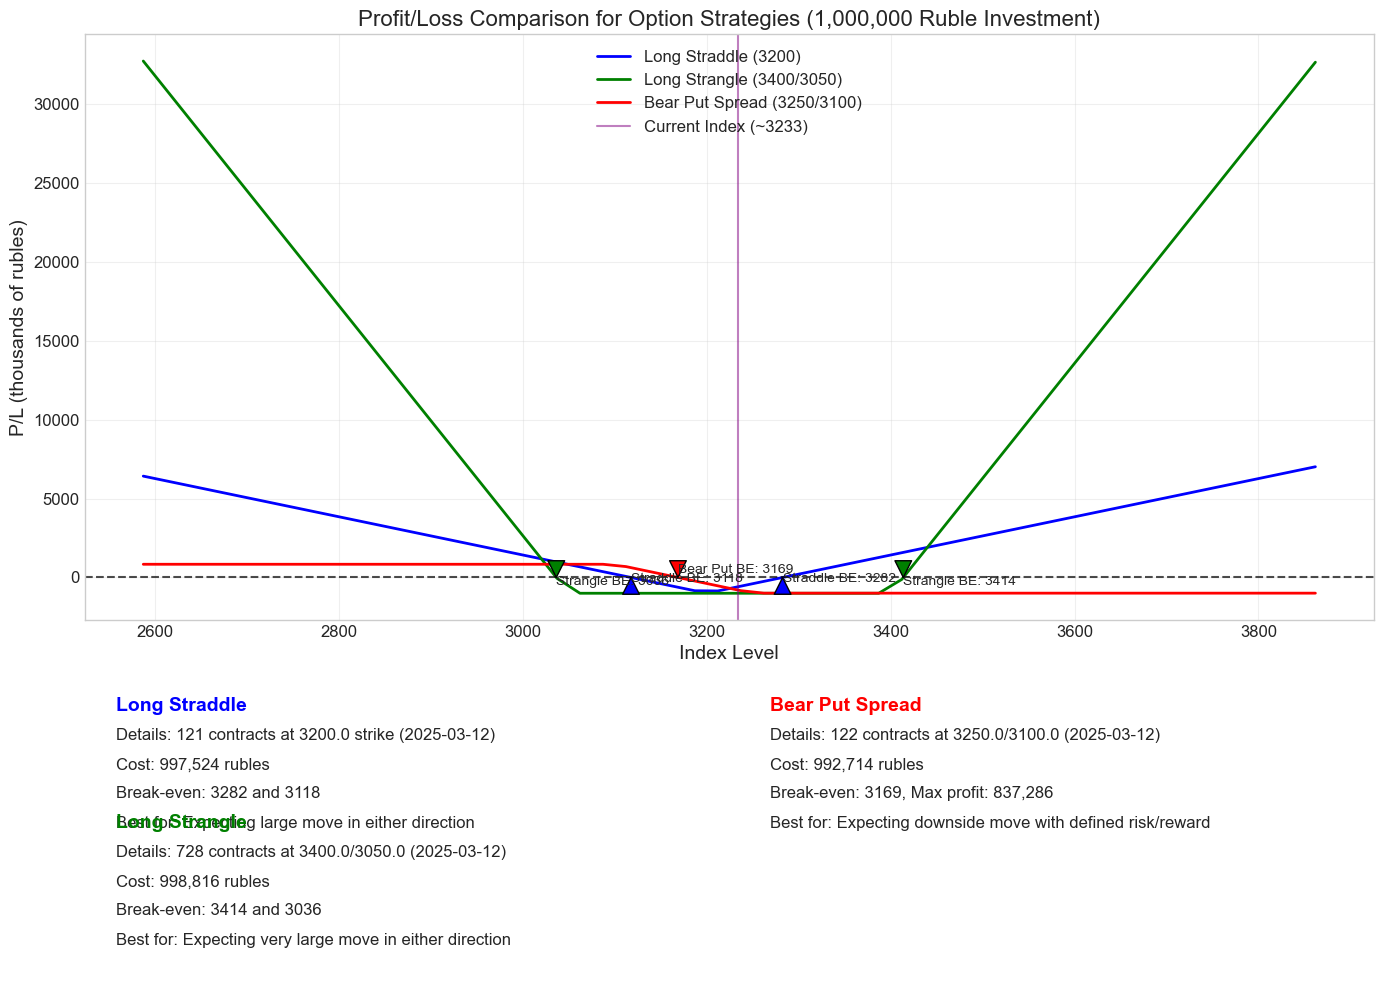

In [ ]:
# Cell 7: Plot Strategy Comparison
def plot_strategy_comparison(strategy_results, avg_index_level):
    """
    Plot profit/loss diagrams for the recommended strategies
    """
    # Current index level
    current_index = avg_index_level
    
    # Find our recommended strategies
    straddle = None
    if strategy_results['straddles']:
        straddle = next((s for s in strategy_results['straddles'] 
                          if abs(s['strike'] - 3200) < 10), 
                         strategy_results['straddles'][0])
    
    strangle = next(iter(strategy_results['strangles']), None)
    bear_put = next(iter(strategy_results['bear_put_spreads']), None)
    
    if not all([straddle, strangle, bear_put]):
        print("Not all strategies are available for plotting")
        return
    
    # Range from -20% to +20% of current index
    min_index = np.floor(current_index * 0.8)
    max_index = np.ceil(current_index * 1.2)
    index_range = np.arange(min_index, max_index, 25)
    
    # Calculate P/L for different strategies across a range of prices
    straddle_pl = []
    strangle_pl = []
    bear_put_pl = []
    
    for i in index_range:
        # Straddle
        if straddle:
            if i > straddle['strike']:
                pl = ((i - straddle['strike']) * straddle['contracts'] * 100) - straddle['investment']
            else:
                pl = ((straddle['strike'] - i) * straddle['contracts'] * 100) - straddle['investment']
            straddle_pl.append(pl / 1000)  # Convert to thousands for better display
        
        # Strangle
        if strangle:
            if i > strangle['call_strike']:
                pl = ((i - strangle['call_strike']) * strangle['contracts'] * 100) - strangle['investment']
            elif i < strangle['put_strike']:
                pl = ((strangle['put_strike'] - i) * strangle['contracts'] * 100) - strangle['investment']
            else:
                pl = -strangle['investment']
            strangle_pl.append(pl / 1000)
        
        # Bear Put Spread
        if bear_put:
            if i >= bear_put['buy_strike']:
                pl = -bear_put['total_cost']
            elif i <= bear_put['sell_strike']:
                pl = bear_put['total_max_profit']
            else:
                pl = ((bear_put['buy_strike'] - i) * bear_put['contracts'] * 100) - bear_put['total_cost']
            bear_put_pl.append(pl / 1000)
    
    # Create the plot
    fig = plt.figure(figsize=(14, 10))
    gs = GridSpec(2, 2, height_ratios=[2, 1])
    
    # Main strategy comparison chart
    ax1 = fig.add_subplot(gs[0, :])
    ax1.plot(index_range, straddle_pl, 'b-', linewidth=2, label=f"Long Straddle ({int(straddle['strike'])})")
    ax1.plot(index_range, strangle_pl, 'g-', linewidth=2, label=f"Long Strangle ({int(strangle['call_strike'])}/{int(strangle['put_strike'])})")
    ax1.plot(index_range, bear_put_pl, 'r-', linewidth=2, label=f"Bear Put Spread ({int(bear_put['buy_strike'])}/{int(bear_put['sell_strike'])})")
    
    # Add horizontal line at y=0 (break-even)
    ax1.axhline(y=0, color='black', linestyle='--', alpha=0.7)
    
    # Add vertical line at current index level
    ax1.axvline(x=current_index, color='purple', linestyle='-', alpha=0.5, label=f"Current Index (~{int(current_index)})")
    
    # Format the plot
    ax1.set_title('Profit/Loss Comparison for Option Strategies (1,000,000 Ruble Investment)', fontsize=16)
    ax1.set_xlabel('Index Level', fontsize=14)
    ax1.set_ylabel('P/L (thousands of rubles)', fontsize=14)
    ax1.legend(loc='best', fontsize=12)
    ax1.grid(True, alpha=0.3)
    
    # Add annotations for break-even points
    if straddle:
        ax1.annotate(f"Straddle BE: {straddle['break_even_down']:.0f}",
                    xy=(straddle['break_even_down'], 0), xytext=(straddle['break_even_down'], -300),
                    arrowprops=dict(facecolor='blue', shrink=0.05), fontsize=10)
        ax1.annotate(f"Straddle BE: {straddle['break_even_up']:.0f}",
                    xy=(straddle['break_even_up'], 0), xytext=(straddle['break_even_up'], -300),
                    arrowprops=dict(facecolor='blue', shrink=0.05), fontsize=10)
    
    if strangle:
        ax1.annotate(f"Strangle BE: {strangle['break_even_down']:.0f}",
                    xy=(strangle['break_even_down'], 0), xytext=(strangle['break_even_down'], -500),
                    arrowprops=dict(facecolor='green', shrink=0.05), fontsize=10)
        ax1.annotate(f"Strangle BE: {strangle['break_even_up']:.0f}",
                    xy=(strangle['break_even_up'], 0), xytext=(strangle['break_even_up'], -500),
                    arrowprops=dict(facecolor='green', shrink=0.05), fontsize=10)
    
    if bear_put:
        ax1.annotate(f"Bear Put BE: {bear_put['break_even']:.0f}",
                    xy=(bear_put['break_even'], 0), xytext=(bear_put['break_even'], 300),
                    arrowprops=dict(facecolor='red', shrink=0.05), fontsize=10)
    
    # Strategy info panels
    strat_info = [
        {
            'title': 'Long Straddle',
            'color': 'blue',
            'data': [
                f"Details: {straddle['contracts']} contracts at {straddle['strike']} strike ({straddle['date'].date()})",
                f"Cost: {straddle['investment']:,.0f} rubles",
                f"Break-even: {straddle['break_even_up']:.0f} and {straddle['break_even_down']:.0f}",
                f"Best for: Expecting large move in either direction"
            ]
        },
        {
            'title': 'Long Strangle',
            'color': 'green',
            'data': [
                f"Details: {strangle['contracts']} contracts at {strangle['call_strike']}/{strangle['put_strike']} ({strangle['date'].date()})",
                f"Cost: {strangle['investment']:,.0f} rubles",
                f"Break-even: {strangle['break_even_up']:.0f} and {strangle['break_even_down']:.0f}",
                f"Best for: Expecting very large move in either direction"
            ]
        },
        {
            'title': 'Bear Put Spread',
            'color': 'red',
            'data': [
                f"Details: {bear_put['contracts']} contracts at {bear_put['buy_strike']}/{bear_put['sell_strike']} ({bear_put['date'].date()})",
                f"Cost: {bear_put['total_cost']:,.0f} rubles",
                f"Break-even: {bear_put['break_even']:.0f}, Max profit: {bear_put['total_max_profit']:,.0f}",
                f"Best for: Expecting downside move with defined risk/reward"
            ]
        }
    ]
    
    # Create info boxes
    ax2 = fig.add_subplot(gs[1, 0])
    ax3 = fig.add_subplot(gs[1, 1])
    
    # Hide axes for info boxes
    ax2.axis('off')
    ax3.axis('off')
    
    # Add strategy information text boxes
    props = dict(boxstyle='round', alpha=0.1)
    
    for i, info in enumerate(strat_info):
        if i <= 1:
            # First two strategies in first box
            ax2.text(0.05, 0.9 - i*0.4, info['title'], fontsize=14, color=info['color'], fontweight='bold')
            for j, line in enumerate(info['data']):
                ax2.text(0.05, 0.8 - i*0.4 - j*0.1, line, fontsize=12)
        else:
            # Third strategy in second box
            ax3.text(0.05, 0.9, info['title'], fontsize=14, color=info['color'], fontweight='bold')
            for j, line in enumerate(info['data']):
                ax3.text(0.05, 0.8 - j*0.1, line, fontsize=12)
    
    plt.tight_layout()
    plt.savefig('strategy_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

# Plot strategy comparison
plot_strategy_comparison(strategy_results, avg_index_level)

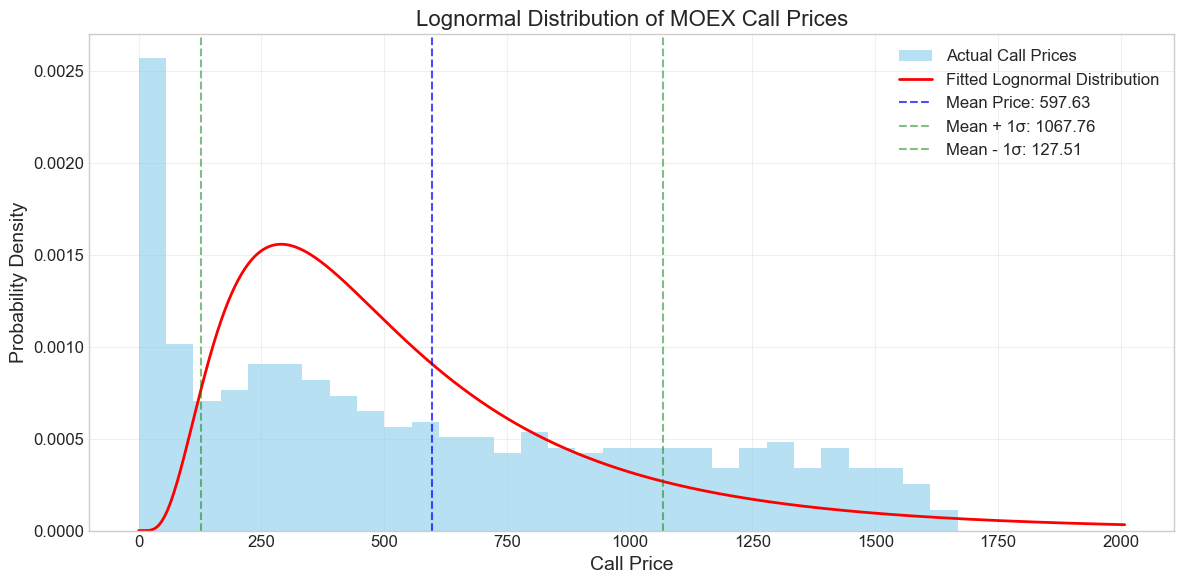

In [20]:
# Cell 8: Plot Lognormal Distribution
def plot_lognormal_distribution(df, mean, std_dev, log_mean, log_sigma):
    """
    Plot lognormal distribution of call prices
    """
    # Get call prices
    call_prices = df['CALL: Расчетная цена'].dropna()
    
    if call_prices.empty:
        print("No call price data available for lognormal analysis")
        return
    
    # Create x values for plotting
    x = np.linspace(max(0.1, mean - 3*std_dev), mean + 3*std_dev, 1000)
    pdf_lognormal = stats.lognorm.pdf(x, s=log_sigma, scale=np.exp(log_mean))
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot histogram of actual data
    ax.hist(call_prices, bins=30, density=True, alpha=0.6, color='skyblue', label='Actual Call Prices')
    
    # Plot lognormal distribution
    ax.plot(x, pdf_lognormal, 'r-', linewidth=2, label='Fitted Lognormal Distribution')
    
    # Add vertical lines for mean
    ax.axvline(x=mean, color='blue', linestyle='--', alpha=0.7, label=f'Mean Price: {mean:.2f}')
    
    # Add vertical lines for +/- 1 std dev
    ax.axvline(x=mean + std_dev, color='green', linestyle='--', alpha=0.5, label=f'Mean + 1σ: {mean+std_dev:.2f}')
    ax.axvline(x=mean - std_dev, color='green', linestyle='--', alpha=0.5, label=f'Mean - 1σ: {max(0, mean-std_dev):.2f}')
    
    # Format the plot
    ax.set_title('Lognormal Distribution of MOEX Call Prices', fontsize=16)
    ax.set_xlabel('Call Price', fontsize=14)
    ax.set_ylabel('Probability Density', fontsize=14)
    ax.legend(loc='best')
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('price_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

# Plot lognormal distribution
plot_lognormal_distribution(df, mean, std_dev, log_mean, log_sigma)

Using mean price as reference: 602.33
Generated signals: 359 Buy, 278 Sell, 122 Neutral


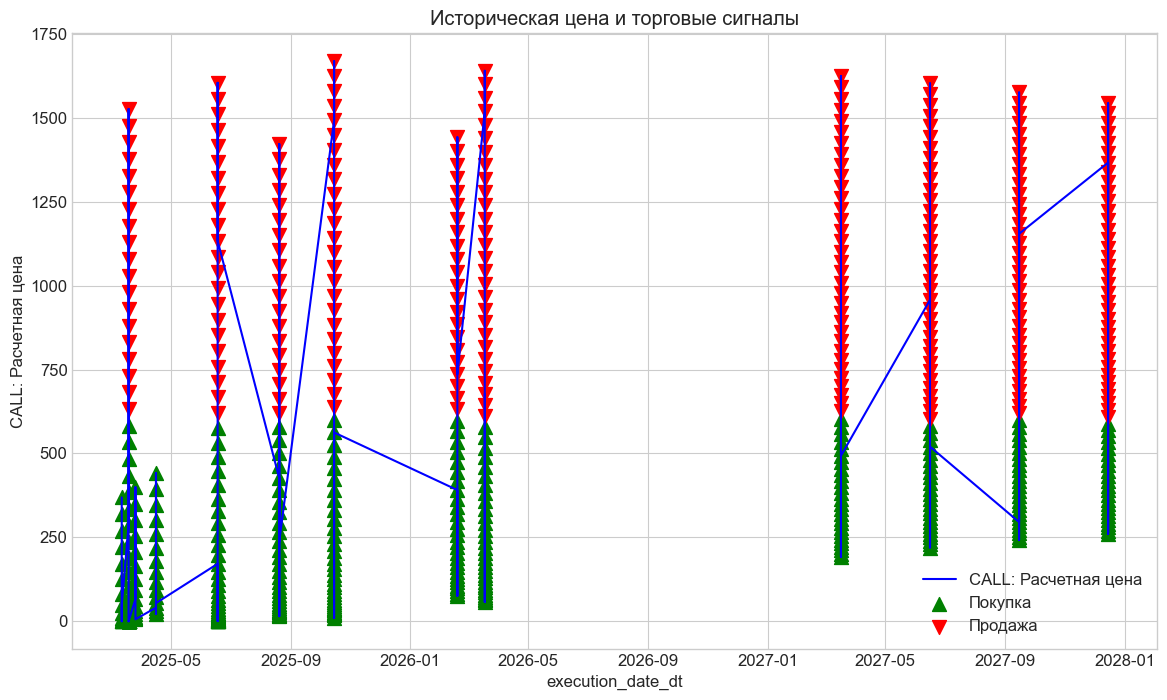

In [21]:
def generate_signals(df, call_Settlement_price, reference_value=None):
    """
    Generate buy/sell signals based on price comparison with a reference value.
    
    Parameters:
    - df: DataFrame containing the price data
    - call_Settlement_price: Column name for the price data
    - reference_value: Value to compare prices against (if None, uses mean price)
    
    Returns:
    - DataFrame with added 'Сигнал' (Signal) column
    """
    df_with_signals = df.copy()
    
    # If no reference value provided, use the mean price
    if reference_value is None:
        reference_value = df_with_signals[call_Settlement_price].mean()
        print(f"Using mean price as reference: {reference_value:.2f}")
    
    # Generate signals based on price comparison
    df_with_signals['Сигнал'] = 'Нейтрально'  # Default is Neutral
    
    # Prices below reference are buy signals
    df_with_signals.loc[df_with_signals[call_Settlement_price] < reference_value, 'Сигнал'] = 'Покупка'
    
    # Prices above reference are sell signals
    df_with_signals.loc[df_with_signals[call_Settlement_price] > reference_value, 'Сигнал'] = 'Продажа'
    
    # Count the signals
    buy_count = (df_with_signals['Сигнал'] == 'Покупка').sum()
    sell_count = (df_with_signals['Сигнал'] == 'Продажа').sum()
    neutral_count = (df_with_signals['Сигнал'] == 'Нейтрально').sum()
    
    print(f"Generated signals: {buy_count} Buy, {sell_count} Sell, {neutral_count} Neutral")
    
    return df_with_signals

# Example usage in your existing code:
# """
# Before plotting, add the signals to your DataFrame
date_ex = 'execution_date_dt'  # Your date column
call_Settlement_price = 'CALL: Расчетная цена'  # Your price column 

# Generate the signals
df_with_signals = generate_signals(df, call_Settlement_price)

# Now you can use the signals for plotting
plt.plot(df_with_signals[date_ex], df_with_signals[call_Settlement_price], label=call_Settlement_price, color='blue')

# Plot buy signals
buy_signals = df_with_signals[df_with_signals['Сигнал'] == 'Покупка']
plt.scatter(buy_signals[date_ex], buy_signals[call_Settlement_price], marker='^', color='green', label='Покупка', s=100)

# Plot sell signals
sell_signals = df_with_signals[df_with_signals['Сигнал'] == 'Продажа']
plt.scatter(sell_signals[date_ex], sell_signals[call_Settlement_price], marker='v', color='red', label='Продажа', s=100)

plt.xlabel(date_ex)
plt.ylabel(call_Settlement_price)
plt.title('Историческая цена и торговые сигналы')
plt.legend()
plt.show()
# """

# More sophisticated signal generation based on mathematical expectation and standard deviation



Математическое ожидание цены: 602.33
Стандартное отклонение цены (волатильность): 481.29
Generated signals: 359 Buy, 278 Sell


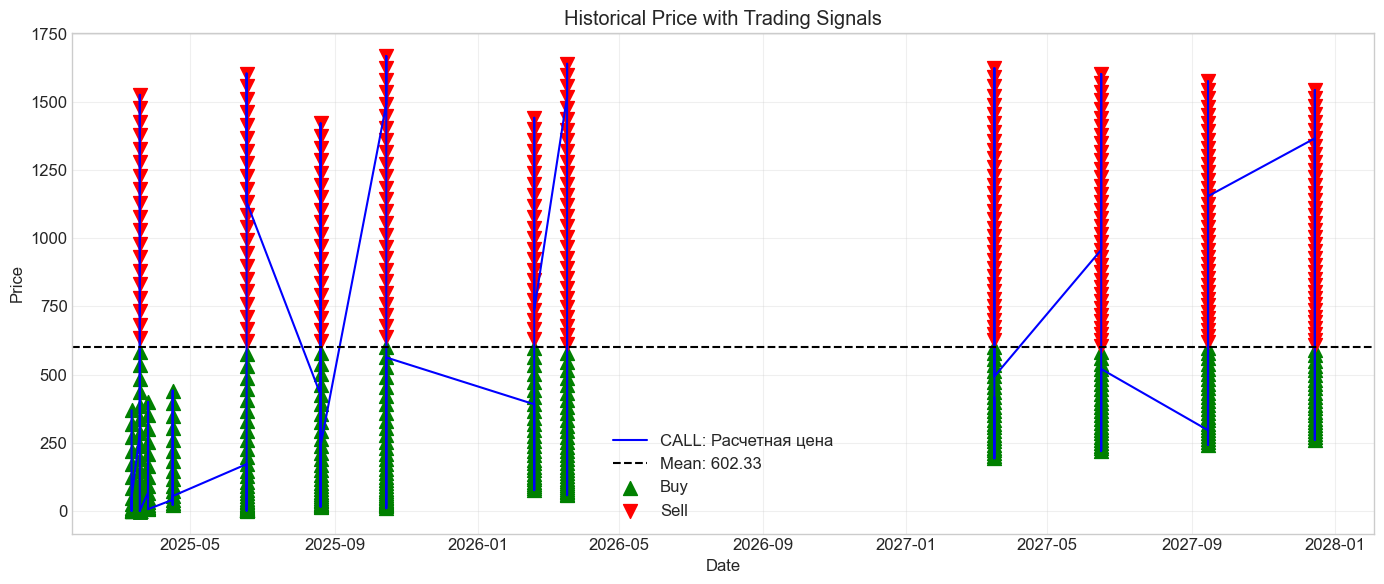

In [22]:
def generate_signal_with_volatility(df, call_Settlement_price):
    """
    Generate trading signals based on mathematical expectation and volatility.
    """
    df_with_signals = df.copy()
    
    # Calculate mathematical expectation (mean)
    math_expectation = df_with_signals[call_Settlement_price].mean()
    
    # Calculate standard deviation (volatility)
    std_deviation = df_with_signals[call_Settlement_price].std()
    
    print(f"\nМатематическое ожидание цены: {math_expectation:.2f}")
    print(f"Стандартное отклонение цены (волатильность): {std_deviation:.2f}")
    
    # Generate signals
    # Buy when price is below mathematical expectation
    # Sell when price is above mathematical expectation
    df_with_signals['Сигнал'] = df_with_signals[call_Settlement_price].apply(
        lambda price: 'Покупка' if price < math_expectation else 
                      'Продажа' if price > math_expectation else 
                      'Нейтрально'
    )
    
    # Count signals
    buy_count = (df_with_signals['Сигнал'] == 'Покупка').sum()
    sell_count = (df_with_signals['Сигнал'] == 'Продажа').sum()
    
    print(f"Generated signals: {buy_count} Buy, {sell_count} Sell")
    
    return df_with_signals

# Example usage with the volatility-based signal generation:
# """
# Generate signals based on mathematical expectation
df_with_signals = generate_signal_with_volatility(df, call_Settlement_price)

# Plot the results
plt.figure(figsize=(14, 6))

# Plot price
plt.plot(df_with_signals[date_ex], df_with_signals[call_Settlement_price], label=call_Settlement_price, color='blue')

# Add horizontal line at mathematical expectation
mean_price = df_with_signals[call_Settlement_price].mean()
plt.axhline(y=mean_price, color='black', linestyle='--', label=f'Mean: {mean_price:.2f}')

# Plot buy signals
buy_signals = df_with_signals[df_with_signals['Сигнал'] == 'Покупка']
plt.scatter(buy_signals[date_ex], buy_signals[call_Settlement_price], marker='^', color='green', label='Buy', s=100)

# Plot sell signals
sell_signals = df_with_signals[df_with_signals['Сигнал'] == 'Продажа']
plt.scatter(sell_signals[date_ex], sell_signals[call_Settlement_price], marker='v', color='red', label='Sell', s=100)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Historical Price with Trading Signals')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
# """

In [23]:
# Cell 9: Final Recommendations
print("\n=== FINAL RECOMMENDATION ===")
print("Based on the analysis, the following strategies are recommended:")

# Find the bear put spread with the best ROI
if strategy_results['bear_put_spreads']:
    best_bear_put = max(strategy_results['bear_put_spreads'], key=lambda x: x['roi'])
    print(f"\n1. BEAR PUT SPREAD (March {best_bear_put['date'].day}, 2025)")
    print(f"   Buy Put @ {best_bear_put['buy_strike']}, Sell Put @ {best_bear_put['sell_strike']}")
    print(f"   Cost: {best_bear_put['total_cost']:,.0f} rubles for {best_bear_put['contracts']} contracts")
    print(f"   Break-even: {best_bear_put['break_even']:.2f} ({best_bear_put['pct_move']:.2f}% move)")
    print(f"   Maximum profit: {best_bear_put['total_max_profit']:,.0f} rubles ({best_bear_put['roi']:.2f}% ROI)")
    print(f"   This strategy offers the best risk-reward ratio for expected downside movement.")

# Find the straddle with the smallest required move
if strategy_results['straddles']:
    best_straddle = min(strategy_results['straddles'], key=lambda x: min(x['pct_move_up'], x['pct_move_down']))
    print(f"\n2. LONG STRADDLE (March {best_straddle['date'].day}, 2025)")
    print(f"   Buy Call and Put @ {best_straddle['strike']} strike")
    print(f"   Cost: {best_straddle['investment']:,.0f} rubles for {best_straddle['contracts']} contracts")
    print(f"   Break-even Up: {best_straddle['break_even_up']:.2f} ({best_straddle['pct_move_up']:.2f}% move)")
    print(f"   Break-even Down: {best_straddle['break_even_down']:.2f} ({best_straddle['pct_move_down']:.2f}% move)")
    print(f"   This strategy provides unlimited profit potential in either direction with defined risk.")

# Find the strangle with the best leverage
if strategy_results['strangles']:
    best_strangle = max(strategy_results['strangles'], key=lambda x: x['contracts'])
    print(f"\n3. LONG STRANGLE (March {best_strangle['date'].day}, 2025)")
    print(f"   Buy OTM Call @ {best_strangle['call_strike']} and OTM Put @ {best_strangle['put_strike']}")
    print(f"   Cost: {best_strangle['investment']:,.0f} rubles for {best_strangle['contracts']} contracts")
    print(f"   Break-even Up: {best_strangle['break_even_up']:.2f} ({best_strangle['pct_move_up']:.2f}% move)")
    print(f"   Break-even Down: {best_strangle['break_even_down']:.2f} ({best_strangle['pct_move_down']:.2f}% move)")
    print(f"   This strategy offers maximum leverage for significant market moves.")

print("\n=== STRATEGY SUMMARY ===")
summary_data = []

if strategy_results['straddles']:
    summary_data.append({
        'Strategy': 'Long Straddle',
        'Strike(s)': f"{best_straddle['strike']}",
        'Break-even': f"{best_straddle['break_even_down']:.0f}/{best_straddle['break_even_up']:.0f}",
        'Contracts': best_straddle['contracts'],
        'Investment': f"{best_straddle['investment']:,.0f}",
        'Required Move': f"{min(best_straddle['pct_move_up'], best_straddle['pct_move_down']):.2f}%"
    })

if strategy_results['strangles']:
    summary_data.append({
        'Strategy': 'Long Strangle',
        'Strike(s)': f"{best_strangle['put_strike']}/{best_strangle['call_strike']}",
        'Break-even': f"{best_strangle['break_even_down']:.0f}/{best_strangle['break_even_up']:.0f}",
        'Contracts': best_strangle['contracts'],
        'Investment': f"{best_strangle['investment']:,.0f}",
        'Required Move': f"{min(best_strangle['pct_move_up'], best_strangle['pct_move_down']):.2f}%"
    })

if strategy_results['bear_put_spreads']:
    summary_data.append({
        'Strategy': 'Bear Put Spread',
        'Strike(s)': f"{best_bear_put['buy_strike']}/{best_bear_put['sell_strike']}",
        'Break-even': f"{best_bear_put['break_even']:.0f}",
        'Contracts': best_bear_put['contracts'],
        'Investment': f"{best_bear_put['total_cost']:,.0f}",
        'Required Move': f"{best_bear_put['pct_move']:.2f}%"
    })

pd.DataFrame(summary_data)


=== FINAL RECOMMENDATION ===
Based on the analysis, the following strategies are recommended:

1. BEAR PUT SPREAD (March 26, 2025)
   Buy Put @ 3250.0, Sell Put @ 2950.0
   Cost: 996,732 rubles for 108 contracts
   Break-even: 3157.71 (2.36% move)
   Maximum profit: 2,243,268 rubles (225.06% ROI)
   This strategy offers the best risk-reward ratio for expected downside movement.

2. LONG STRADDLE (March 12, 2025)
   Buy Call and Put @ 3000.0 strike
   Cost: 983,586 rubles for 51 contracts
   Break-even Up: 3192.86 (-1.27% move)
   Break-even Down: 2807.14 (13.20% move)
   This strategy provides unlimited profit potential in either direction with defined risk.

3. LONG STRANGLE (March 12, 2025)
   Buy OTM Call @ 3400.0 and OTM Put @ 3050.0
   Cost: 998,816 rubles for 728 contracts
   Break-even Up: 3413.72 (5.56% move)
   Break-even Down: 3036.28 (6.11% move)
   This strategy offers maximum leverage for significant market moves.

=== STRATEGY SUMMARY ===


,Strategy,Strike(s),Break-even,Contracts,Investment,Required Move
0,Long Straddle,3000.0,2807/3193,51,"983,586",-1.27%
1,Long Strangle,3050.0/3400.0,3036/3414,728,"998,816",5.56%
2,Bear Put Spread,3250.0/2950.0,3158,108,"996,732",2.36%
